# Dave's Project

#### Description of the Dataset:

* Content: Information on thousands of laptops

* Includes: Processor specs, memory capacity, storage size, display features, graphics capabilities, battery life, OS, etc.

* Scope: Spans various brands, models, configurations (entry-level to high-end)


#### Objectives:

* Data Cleaning: Meticulously clean the dataset.

* Insight Extraction: Extract valuable insights focusing on:
      General Price Distribution
      Price Distribution across Brands
      Relationship between RAM and Price
      Performance vs. Price Analysis
      Operating System Preferences
      
* Analysis Techniques:

     Price Distribution across Brands: Bar chart or boxplot.
     RAM vs. Price Relationship: Scatter plot.
     Performance vs. Price Analysis: Scatter plot or line chart (Processor speed/graphics vs. prices).
     Operating System Preference: Bar chart for OS distribution.
     
* Hypothesis Testing: Utilize Linear Regression Modelling.


#### Questions to Address:

* General Price Distribution: 

Visualize the overall distribution of laptop prices.

* Price Distribution across Brands:

Understand how prices vary among different laptop brands.

* Relationship between RAM and Price:

Explore the correlation between RAM size and laptop prices.

* Performance vs. Price Analysis:

Determine how processor speed or graphics capabilities influence laptop prices.

* Operating System Preference:

Analyze the prevalence of various operating systems among laptops.


#### Analysis Approaches:

* Price Distribution across Brands: 

Use a Bar Chart or Boxplot to display price ranges per brand.

* Relationship between RAM and Price:

Utilize a Scatter Plot to showcase the correlation between RAM size and laptop prices.

* Performance vs. Price Analysis:

Scatter Plot or Line Chart to illustrate the impact of processor speed or graphics capabilities on laptop prices.

* Operating System Preference:

Bar Chart to visualize the distribution of different operating systems.

* Hypothesis Testing:

Employ Linear Regression Modelling to test hypotheses, predict prices based on various factors, etc.

## Getting my Csv Dataset into Jupyter nootebook and importing all necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [2]:
#loading the laptop dataset into a DataFrame

file_path = 'laptop_data_uncleaned.csv'
data = pd.read_csv(file_path)

## Initial exploration of the dataset

In [3]:
#checking the dataset
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
#Checking the data types and basic statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


## Cleaning My Dataset 

In [5]:
#Renaming the column named 'Unnamed:0'to Product_IDS
data.rename({"Unnamed: 0":"Product_IDS"}, axis = 1, inplace = True)

In [6]:
# Checking for missing values
data.isnull().sum()

Product_IDS         30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [7]:
# removing missing values 
data.dropna(inplace=True)

In [8]:
# Checking for duplicates based on 'Product_IDS' column
duplicates = data[data.duplicated(subset=['Product_IDS'], keep=False)]

## Working on each column in my Dataset

In [9]:
# working on 'TypeName' column

counts_type =data['TypeName'].value_counts()  # counting number of element in 'Type column'

print(counts_type)

rare_type = counts_type[counts_type<=30].index # counting the number of element in 'counts_type'< 30

print(rare_type)

data['TypeName'] = data['TypeName'].replace(rare_type,'Others')

print(data['TypeName'])

Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: TypeName, dtype: int64
Index(['Workstation', 'Netbook'], dtype='object')
0                Ultrabook
1                Ultrabook
2                 Notebook
3                Ultrabook
4                Ultrabook
               ...        
1298    2 in 1 Convertible
1299    2 in 1 Convertible
1300              Notebook
1301              Notebook
1302              Notebook
Name: TypeName, Length: 1273, dtype: object


In [10]:
# working on 'Inches' column

#errors='coerce' specifies that if there are any errors during conversion , 
#those errors should be converted to NaN (Not a Number)

data['Inches'] = pd.to_numeric(data['Inches'].str.replace('"', ''), errors='coerce')


#removing rows where the 'Inches' column has NaN

data = data.dropna(subset=['Inches'])

print(data['Inches'])

0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1298    14.0
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: Inches, Length: 1272, dtype: float64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_IDS       1272 non-null   float64
 1   Company           1272 non-null   object 
 2   TypeName          1272 non-null   object 
 3   Inches            1272 non-null   float64
 4   ScreenResolution  1272 non-null   object 
 5   Cpu               1272 non-null   object 
 6   Ram               1272 non-null   object 
 7   Memory            1272 non-null   object 
 8   Gpu               1272 non-null   object 
 9   OpSys             1272 non-null   object 
 10  Weight            1272 non-null   object 
 11  Price             1272 non-null   float64
dtypes: float64(3), object(9)
memory usage: 129.2+ KB


In [12]:
# working on 'screen_size_ranges' column
screen_size_ranges = data['Inches'].quantile([0, 0.25, 0.5, 0.75, 1])
screen_size_labels = ['Small', 'Medium', 'Large']

# Using pandas.cut to create a new column with screen size groups
data.loc[:, 'ScreenSizeGroup'] = pd.cut(data['Inches'], bins=screen_size_ranges, labels=screen_size_labels, include_lowest=True, duplicates='drop')


In [13]:
data.head()

,Product_IDS,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenSizeGroup
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Small
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Small
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Medium
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Medium
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Small


In [14]:
#working  on 'ScreenResolution' column
data['ScreenResolution'].describe()

count                  1272
unique                   40
top       Full HD 1920x1080
freq                    494
Name: ScreenResolution, dtype: object

In [15]:
# working the Ram column
def extract_ram_size(ram_description):
    try:
        ram_size = int(ram_description.replace('GB', '').strip())
        return ram_size
    except ValueError:
        return None

# Finding indices where 'Ram' column contains 'GB'
indices = data['Ram'].str.contains('GB', na=False)

# Extracting Ram size in GB using loc

data.loc[indices, 'Ram'] = data.loc[indices, 'Ram'].apply(extract_ram_size)


In [16]:
data['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1272, dtype: int64

In [17]:
# Working on the 'Weight' column
data.rename(columns={'Weight': 'Weight_in_KGs'}, inplace=True)  # Renaming Weight column to Weight in KGs

data['Weight_in_KGs'] = data['Weight_in_KGs'].astype(str)  # Convert to string type first
data['Weight_in_KGs'] = data['Weight_in_KGs'].str.replace("kg", "")  # Stripping off 'kg'
data['Weight_in_KGs'] = data['Weight_in_KGs'].replace('?', '0')  # Replacing '?' with '0'
data['Weight_in_KGs'] = data['Weight_in_KGs'].astype(float)  # Converting to float data type

data.head()


,Product_IDS,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_in_KGs,Price,ScreenSizeGroup
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Small
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Small
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Medium
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Medium
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Small


In [18]:
# working on price column

d_places=2 #running to 2 decimal places
data['Price'] = data['Price'].round(d_places)
data.head()

,Product_IDS,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_in_KGs,Price,ScreenSizeGroup
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Small
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Small
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,Medium
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Medium
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Small


In [19]:
# working on the 'Cpu' column


def extract_cpu_ghz(cpu_description):
    ghz_match = re.search(r'(\d+\.\d+)GHz', cpu_description)
    if ghz_match:
        return float(ghz_match.group(1))
    else:
        return None



# Extracting GHz value from "Cpu" column and create a new column "CpuGHz"
data['CpuGHz'] = data['Cpu'].apply(extract_cpu_ghz)

data.head()

,Product_IDS,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_in_KGs,Price,ScreenSizeGroup,CpuGHz
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Small,2.3
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Small,1.8
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,Medium,2.5
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Medium,2.7
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Small,3.1


In [20]:
def remove_cpu_ghz(cpu_description):
    return re.sub(r'\s*\d+\.\d+GHz', '', cpu_description)


data['Cpu'] = data['Cpu'].apply(remove_cpu_ghz)
data

,Product_IDS,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_in_KGs,Price,ScreenSizeGroup,CpuGHz
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Small,2.3
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Small,1.8
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,Medium,2.5
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Medium,2.7
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Small,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,Small,2.5
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,Small,2.5
1300,1300.0,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,Small,1.6
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,Medium,2.5


In [21]:
# removing missing values 
data.dropna(inplace=True)

In [22]:
print(data.dtypes)

Product_IDS          float64
Company               object
TypeName              object
Inches               float64
ScreenResolution      object
Cpu                   object
Ram                    int64
Memory                object
Gpu                   object
OpSys                 object
Weight_in_KGs        float64
Price                float64
ScreenSizeGroup     category
CpuGHz               float64
dtype: object


## checking if my data set is thoroughly cleaned

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Product_IDS       1188 non-null   float64 
 1   Company           1188 non-null   object  
 2   TypeName          1188 non-null   object  
 3   Inches            1188 non-null   float64 
 4   ScreenResolution  1188 non-null   object  
 5   Cpu               1188 non-null   object  
 6   Ram               1188 non-null   int64   
 7   Memory            1188 non-null   object  
 8   Gpu               1188 non-null   object  
 9   OpSys             1188 non-null   object  
 10  Weight_in_KGs     1188 non-null   float64 
 11  Price             1188 non-null   float64 
 12  ScreenSizeGroup   1188 non-null   category
 13  CpuGHz            1188 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 131.2+ KB


In [24]:
data.isnull().sum() 


Product_IDS         0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight_in_KGs       0
Price               0
ScreenSizeGroup     0
CpuGHz              0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
data.isnull().sum()

Product_IDS         0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight_in_KGs       0
Price               0
ScreenSizeGroup     0
CpuGHz              0
dtype: int64

### VISUALIZING MY DATASET TO GENERATE AN INSIGHT ABOUT LAPTOP SALES

In [27]:
data.describe()

,Product_IDS,Inches,Ram,Weight_in_KGs,Price,CpuGHz
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,664.411616,15.071801,8.697811,2.065800,61950.837896,2.303636
std,376.310052,1.914681,5.646607,0.819225,37322.540729,0.512436
min,0.000000,10.100000,1.000000,0.000000,9270.720000,0.900000
25%,337.750000,14.000000,4.000000,1.490000,34978.452500,1.800000
50%,672.500000,15.600000,8.000000,2.040000,53879.400000,2.500000
75%,992.250000,15.600000,8.000000,2.332500,79866.720000,2.700000
max,1302.000000,35.600000,64.000000,11.100000,324954.720000,3.600000


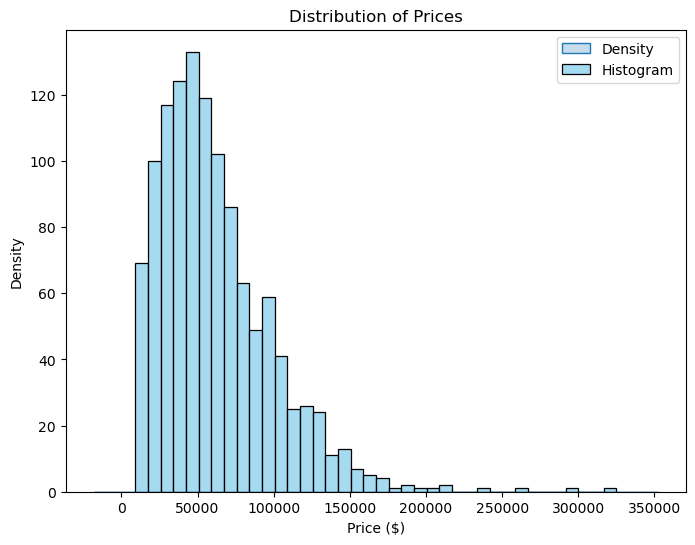

In [28]:
 # Density plot showing  the general Price distribution
plt.figure(figsize=(8, 6))

# Plotting the density plot
sns.kdeplot(data["Price"], shade=True, label="Density")

# Plotting the histogram
sns.histplot(data["Price"], kde=False, color='skyblue', label="Histogram")

plt.title('Distribution of Prices')
plt.xlabel('Price ($)')
plt.legend()
plt.show()


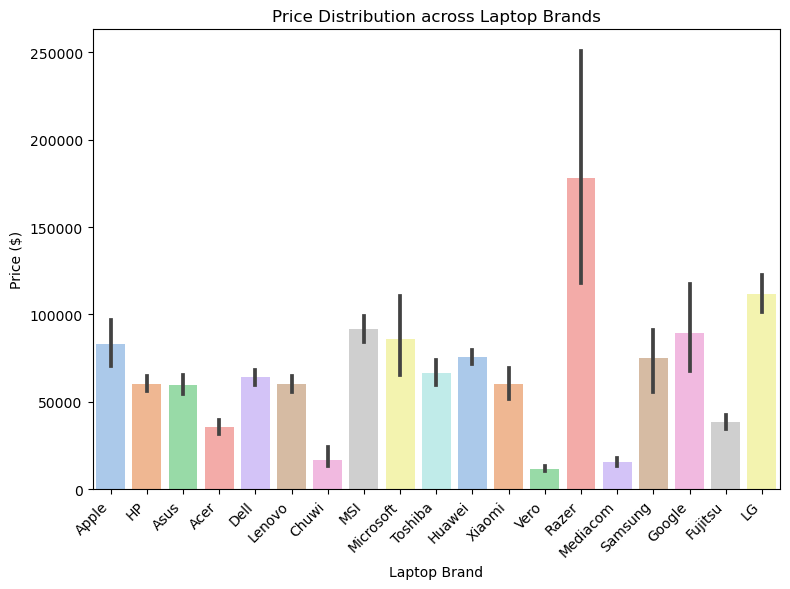

In [29]:
# Queston1: displaying barchart for Price Distribution across Brands
plt.figure(figsize=(8,6))
sns.barplot(x='Company', y='Price', data=data, palette='pastel')  # Creating a bar chart using Seaborn
plt.xlabel('Laptop Brand')   # Label for x-axis
plt.ylabel('Price ($)')   # Label for y-axis
plt.title('Price Distribution across Laptop Brands')   # Title of the chart
plt.xticks(rotation=45, ha='right')   # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels or titles
plt.show()  # Display the chart

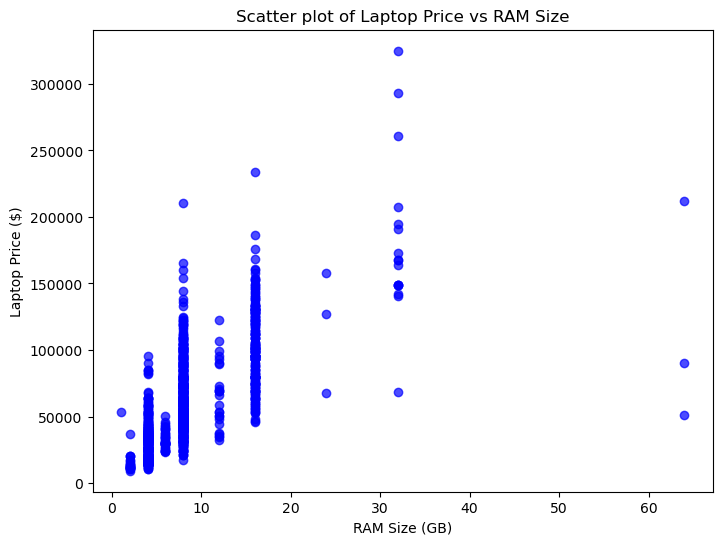

In [30]:
# A scatterplot displaying how RAM size correlates with the laptop price 
plt.figure(figsize=(8, 6))
plt.scatter(data['Ram'], data['Price'], color='blue', alpha=0.7)
plt.title('Scatter plot of Laptop Price vs RAM Size')
plt.xlabel('RAM Size (GB)')
plt.ylabel('Laptop Price ($)')

plt.show()

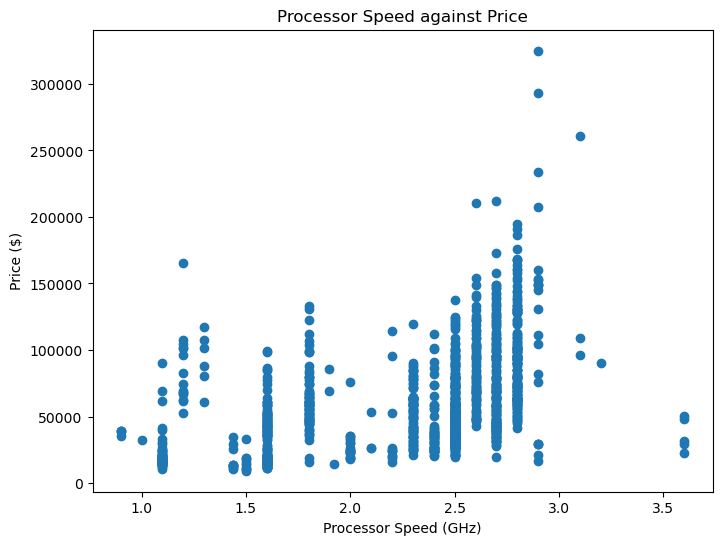

In [31]:
# Plotting how processor speed or graphics capabilities affect laptop prices
plt.figure(figsize=(8, 6))
plt.scatter(data['CpuGHz'], data['Price'], linestyle='-')
plt.xlabel('Processor Speed (GHz)')
plt.ylabel('Price ($)')
plt.title('Processor Speed against Price')
plt.show()

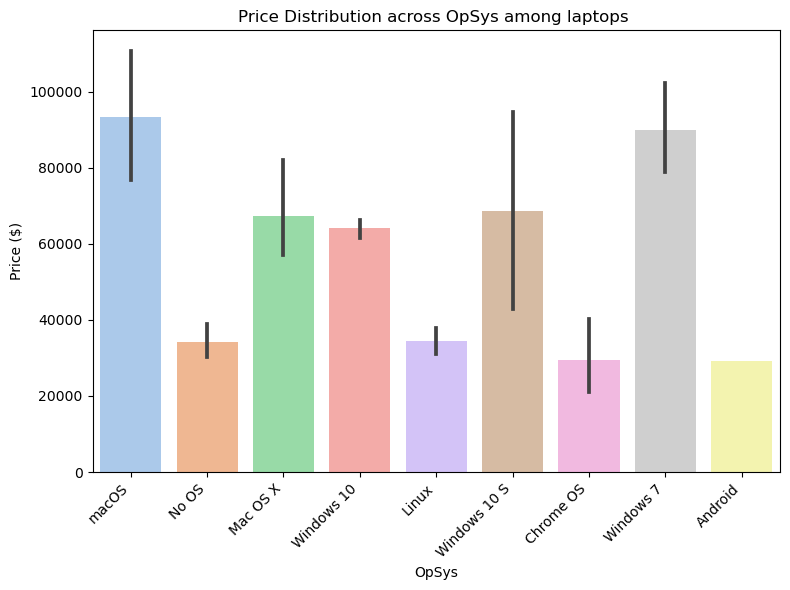

In [32]:
# displaying barchart for Price Distribution across OpSys among laptops.
plt.figure(figsize=(8,6))
sns.barplot(x='OpSys', y='Price', data=data, palette='pastel')  # Creating a bar chart using Seaborn
plt.xlabel('OpSys')   # Label for x-axis
plt.ylabel('Price ($)')   # Label for y-axis
plt.title('Price Distribution across OpSys among laptops ')   # Title of the chart
plt.xticks(rotation=45, ha='right')   # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels or titles
plt.show()  # Display the chart

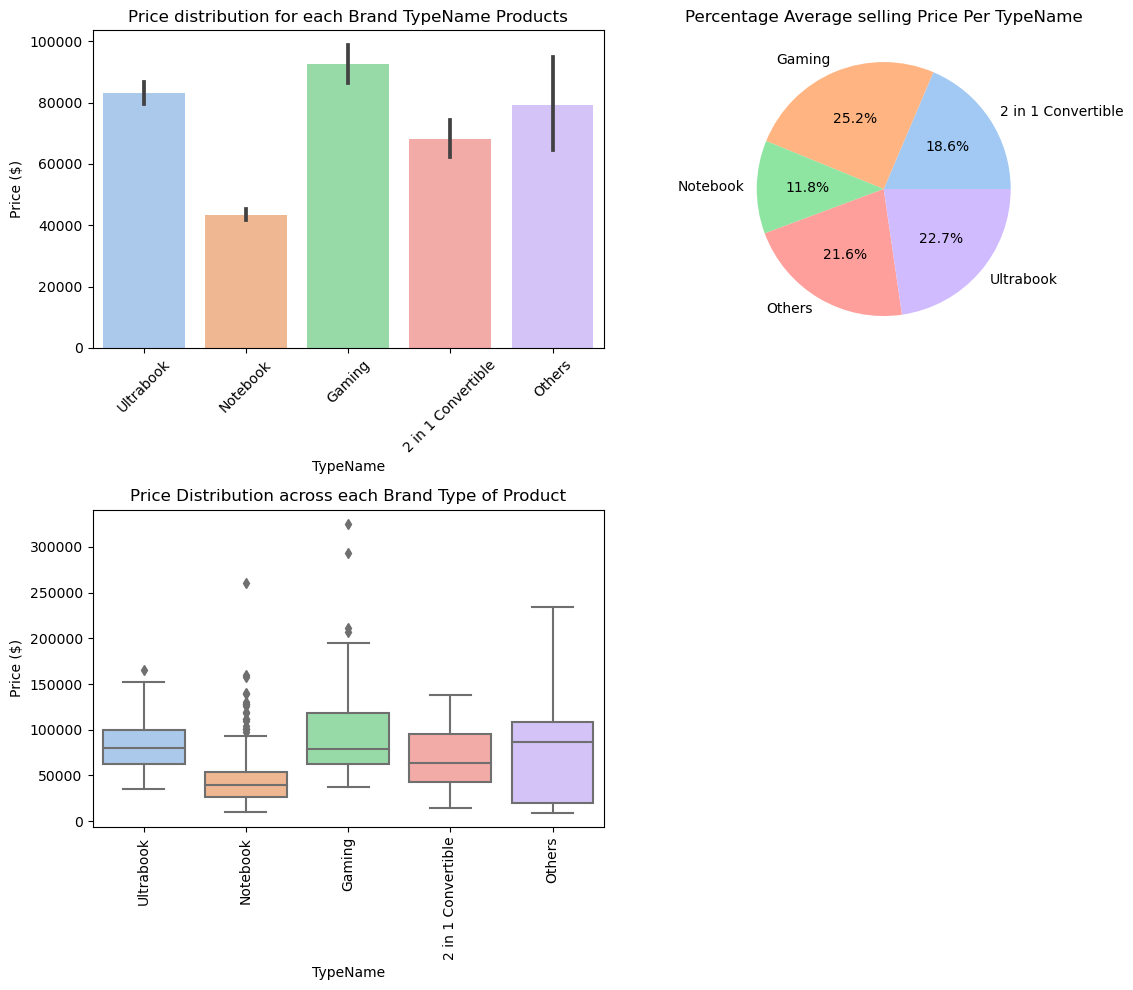

In [39]:
# distribution Charts for typename

# Defining a custom color palette
custom_palette = sns.color_palette('pastel')

# sorting 

# Setting up the figure and axes for all plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))



# Bar chart - Price distribution for each Brand TypeName Products
sns.barplot(x='TypeName', y='Price', data=data, palette=custom_palette, ax=axes[0, 0])
axes[0, 0].set_xlabel('TypeName')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price distribution for each Brand TypeName Products')
axes[0, 0].tick_params(axis='x', rotation=45)

# Pie chart - Percentage Average selling Price Per TypeName
avg_sell_TypeName = data.groupby("TypeName")["Price"].mean().to_frame()
axes[0, 1].pie(avg_sell_TypeName["Price"], autopct='%.1f%%', labels=avg_sell_TypeName.index, colors=custom_palette)
axes[0, 1].set_title("Percentage Average selling Price Per TypeName")

# Boxplot displaying Price Distribution across Brands
sns.boxplot(x='TypeName', y='Price', data=data, palette=custom_palette, ax=axes[1, 0])
axes[1, 0].set_title("Price Distribution across each Brand Type of Product")
axes[1, 0].set_xlabel('TypeName')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].tick_params(axis='x', rotation=90)

# Remove the last empty subplot
fig.delaxes(axes[1, 1])

# Display all charts
plt.tight_layout()
plt.show()


In [34]:
# Performing Hypothesis Testing
# Null Hypothesis (H0): The average sales across branches A, B, and C are equal.
# Alternative Hypothesis (H1): The average sales across branches A, B, and C are not equal.

# Subset the data for each branch
TypeName_Ultrabook = data[data['TypeName'] == 'Ultrabook']['Price']
TypeName_Notebook = data[data['TypeName'] == 'Notebook']['Price']
TypeName_Gaming = data[data['TypeName'] == 'Gaming']['Price']
TypeName_2in1_Convertible = data[data['TypeName'] == '2 in 1 Convertible']['Price']  # Updated variable name
TypeName_Others = data[data['TypeName'] == 'Others']['Price']

# Performing ANOVA test
f_statistic, p_value = f_oneway(TypeName_Ultrabook, TypeName_Notebook, TypeName_Gaming, TypeName_2in1_Convertible, TypeName_Others)

# Printing the results
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')

# Defining the significance level 
alpha = 0.05

# Determining significance( critical region)
if p_value < alpha:
    print("Reject null hypothesis: Average Selling Price across TypeName are not equal")
else:
    print("Fail to reject null hypothesis: Average Selling Price across TypeName are equal")


F-Statistic: 131.2376049087156
P-Value: 8.381864203963346e-93
Reject null hypothesis: Average Selling Price across TypeName are not equal


In [35]:
# Fixing a regression model for  selling Price for each Laptop brands
# Features: 'TypeName', 'RAM', 'CpuGH', etc.
features = ['TypeName', 'Ram', 'CpuGHz'] 

# Select features and target variable
X = data[features]
y = data['Price']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fiting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting prices on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Now I can use this trained model to predict selling prices for new data
# For instance, I can use model.predict(new_data) where 'new_data' contains similar features as your training data.


Mean Squared Error: 893747444.0294853
R-squared: 0.1828986551929298
